In [10]:
# Import modules
from sklearn.feature_selection import RFECV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
plt.rcParams['figure.figsize'] = (8,6)

from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
from sklearn.model_selection import RepeatedKFold, cross_validate, train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV


In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset to pandas
df_joined = pd.read_csv('data/df_joined.csv')

In [6]:
df_joined

,SK_ID_CURR,Tenure_Months,Avg_Monthly_Balance,Avg_Monthly_Utilization,Max_Monthly_Utilization,Pct_Txns_Fully_Paid,Months_Fully_Paid,Pct_Txns_Minimum_Paid,Months_Minimum_Paid,Payment_MinPayment_Ratio_mean,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,100011,0.412429,0.061929,0.302678,1.050000,0.554054,0.278912,0.418919,0.322917,0.502230,...,0,0,0,0,0,0,0,0,0,0
1,100013,0.536723,0.022953,0.115301,1.024890,0.770833,0.503401,0.000000,0.000000,0.865673,...,0,0,0,0,0,0,0,0,0,0
2,100023,0.039548,0.003467,0.000000,0.000000,1.000000,0.054422,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,100028,0.271186,0.012143,0.035934,0.165937,0.244898,0.081633,0.142857,0.072917,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,100036,0.062147,0.003467,0.000000,0.000000,1.000000,0.081633,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88960,456242,0.039548,0.162529,0.691240,0.965666,0.000000,0.000000,0.000000,0.000000,3.936694,...,1,0,0,0,0,0,0,0,0,0
88961,456244,0.197740,0.164581,0.444874,1.008061,0.527778,0.129252,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
88962,456246,0.039548,0.017563,0.097309,0.322149,0.250000,0.013605,0.000000,0.000000,7.790879,...,1,0,0,0,0,0,0,0,0,0
88963,456247,0.531073,0.028379,0.161225,1.056679,0.684211,0.442177,0.105263,0.104167,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()
df_joined[['Avg_Monthly_Balance','Months_Fully_Paid', 
           'Months_Minimum_Paid', 'Months_Minimum_Paid', 
           'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
           'Age_Years','Employed_Months', 'AMT_LESS_TOTAL',
           'AMT_LESS_MAX', 'DAYS_LATE_MAX', 'SK_DPD_DEF',
           'AMT_CREDIT_SUM_TOTAL', 'AMT_CREDIT_SUM_DEBT_TOTAL',
           'AMT_CREDIT_SUM_LIMIT_TOTAL', 'AMT_CREDIT_SUM_OVERDUE_TOTAL','Tenure_Months']] = scaler.fit_transform(df_joined[['Avg_Monthly_Balance','Months_Fully_Paid', 
           'Months_Minimum_Paid', 'Months_Minimum_Paid', 
           'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
           'Age_Years','Employed_Months', 'AMT_LESS_TOTAL',
           'AMT_LESS_MAX', 'DAYS_LATE_MAX', 'SK_DPD_DEF',
           'AMT_CREDIT_SUM_TOTAL', 'AMT_CREDIT_SUM_DEBT_TOTAL',
           'AMT_CREDIT_SUM_LIMIT_TOTAL', 'AMT_CREDIT_SUM_OVERDUE_TOTAL','Tenure_Months']])

# Convert non-numeric columns later to flatten
X = df_joined.drop(columns=['W_DEFAULT'])
y = df_joined['W_DEFAULT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)

# Combine the resampled features and target variable into a single DataFrame
df_smote = pd.concat([X_res_smote, y_res_smote], axis=1)

df_smote.head()

Python(11416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


,SK_ID_CURR,Tenure_Months,Avg_Monthly_Balance,Avg_Monthly_Utilization,Max_Monthly_Utilization,Pct_Txns_Fully_Paid,Months_Fully_Paid,Pct_Txns_Minimum_Paid,Months_Minimum_Paid,Payment_MinPayment_Ratio_mean,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,W_DEFAULT
0,344496,0.112994,0.003467,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0.0
1,228692,0.045198,0.083030,0.676647,1.038296,0.111111,0.006803,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,281930,0.141243,0.087547,0.302559,0.878619,0.307692,0.054422,0.000000,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,0.0
3,298803,0.022599,0.103580,0.460726,0.916242,0.000000,0.000000,0.200000,0.010417,0.0,...,0,0,0,0,0,0,0,0,0,1.0
4,450479,0.412429,0.006406,0.020289,0.311094,0.878378,0.442177,0.027027,0.020833,0.0,...,0,0,0,0,0,1,0,0,0,0.0


Ratio of minority class to majority: 1.00


Text(0.5, 1.0, 'SMOTE Balanced')

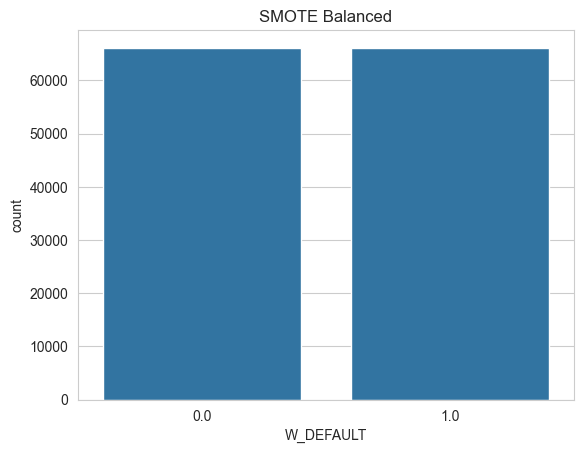

In [9]:
minority_ratio = df_smote['W_DEFAULT'].value_counts()[1] / \
    df_smote['W_DEFAULT'].value_counts()[0]

print(f"Ratio of minority class to majority: {minority_ratio:.2f}")

sns.countplot(data = df_smote, x = 'W_DEFAULT').set_title('SMOTE Balanced')

In [24]:
from sklearn.metrics import average_precision_score

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.5, 0.8, 1],
    'max_depth': [1, 10],
    'min_child_weight': [1, 3],
    'scale_pos_weight': [15, 20]
}

XGB_SMOTE_RFECV = XGBClassifier(random_state=0, n_jobs=-1)
rfecv_XGB = RFECV(estimator=XGB_SMOTE_RFECV, step=1, cv=10, scoring='accuracy', n_jobs=-1)

# Create pipeline
pipeline = Pipeline([
    #('feature_selection', rfecv_XGB)
    ('classification', XGB_SMOTE_RFECV)
])

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=XGB_SMOTE_RFECV,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Record start time
start_time = time.time()
# Print timing
print(f"Model training started at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")

# Fit the model
grid_search.fit(X_res_smote, y_res_smote)

# Record end time
end_time = time.time()

print(f"Model training ended at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate performance on a test set
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_probs >= 0.3).astype(int)  # Adjust threshold to 0.3

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print results
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC (PR AUC): {pr_auc:.4f}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Model training started at: 2024-11-26 21:40:05
Fitting 5 folds for each of 160 candidates, totalling 800 fits


Python(12371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Model training ended at: 2024-11-26 22:02:26
Total Training Time: 1341.09 seconds
Best Parameters:  {'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 15}

Model Performance:
Accuracy: 0.9117
Precision: 0.2708
Recall: 0.1193
F1 Score: 0.1656
MCC: 0.1383
ROC AUC: 0.7028
Precision-Recall AUC (PR AUC): 0.1740
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     16485
         1.0       0.27      0.12      0.17      1308

    accuracy                           0.91     17793
   macro avg       0.60      0.55      0.56     17793
weighted avg       0.88      0.91      0.90     17793

Confusion Matrix:
[[16065   420]
 [ 1152   156]]


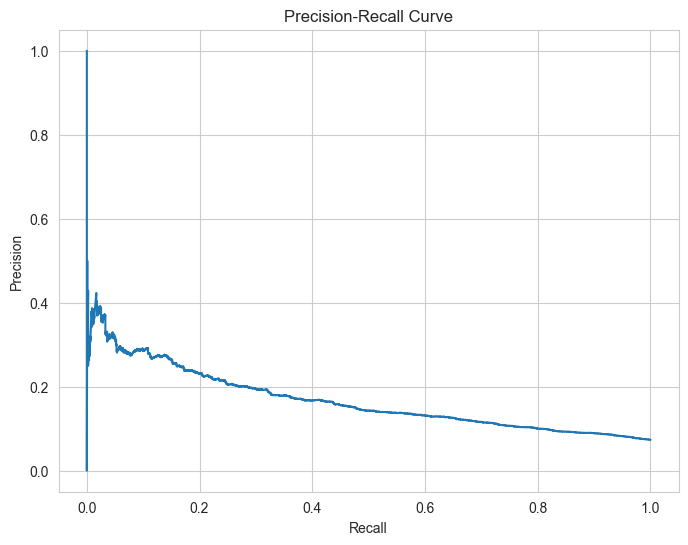

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probs = grid_search.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [28]:
from sklearn.metrics import average_precision_score

# Define hyperparameter grid
#Best Parameters:  {'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 15}
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.5],
    'max_depth': [10],
    'min_child_weight': [1],
    'scale_pos_weight': [15],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 1, 5, 10]
}

XGB_SMOTE_RFECV = XGBClassifier(random_state=0, n_jobs=-1)
rfecv_XGB = RFECV(estimator=XGB_SMOTE_RFECV, step=1, cv=10, scoring='accuracy', n_jobs=-1)

# Create pipeline
pipeline = Pipeline([
    #('feature_selection', rfecv_XGB)
    ('classification', XGB_SMOTE_RFECV)
])

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=XGB_SMOTE_RFECV,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Record start time
start_time = time.time()
# Print timing
print(f"Model training started at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")

# Fit the model
grid_search.fit(X_res_smote, y_res_smote)

# Record end time
end_time = time.time()

print(f"Model training ended at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate performance on a test set
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_probs >= 0.3).astype(int)  # Adjust threshold to 0.3

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print results
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC (PR AUC): {pr_auc:.4f}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Model training started at: 2024-11-26 22:21:55
Fitting 5 folds for each of 12 candidates, totalling 60 fits


Python(12919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Model training ended at: 2024-11-26 22:23:56
Total Training Time: 121.06 seconds
Best Parameters:  {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'scale_pos_weight': 15}

Model Performance:
Accuracy: 0.9117
Precision: 0.2708
Recall: 0.1193
F1 Score: 0.1656
MCC: 0.1383
ROC AUC: 0.7028
Precision-Recall AUC (PR AUC): 0.1740
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     16485
         1.0       0.27      0.12      0.17      1308

    accuracy                           0.91     17793
   macro avg       0.60      0.55      0.56     17793
weighted avg       0.88      0.91      0.90     17793

Confusion Matrix:
[[16065   420]
 [ 1152   156]]


In [32]:
# Access the best XGBoost model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Feature importance from the best model
importance = best_xgb_model.feature_importances_

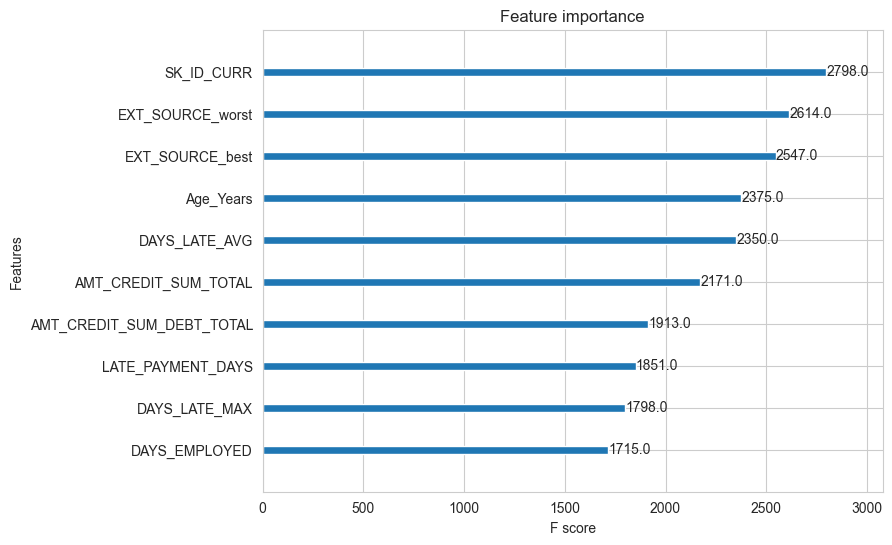

In [36]:
from xgboost import plot_importance

# Plot importance directly
plot_importance(best_xgb_model, max_num_features=10, importance_type='weight')
plt.show()

100%|===================| 71132/71172 [27:05<00:00]        

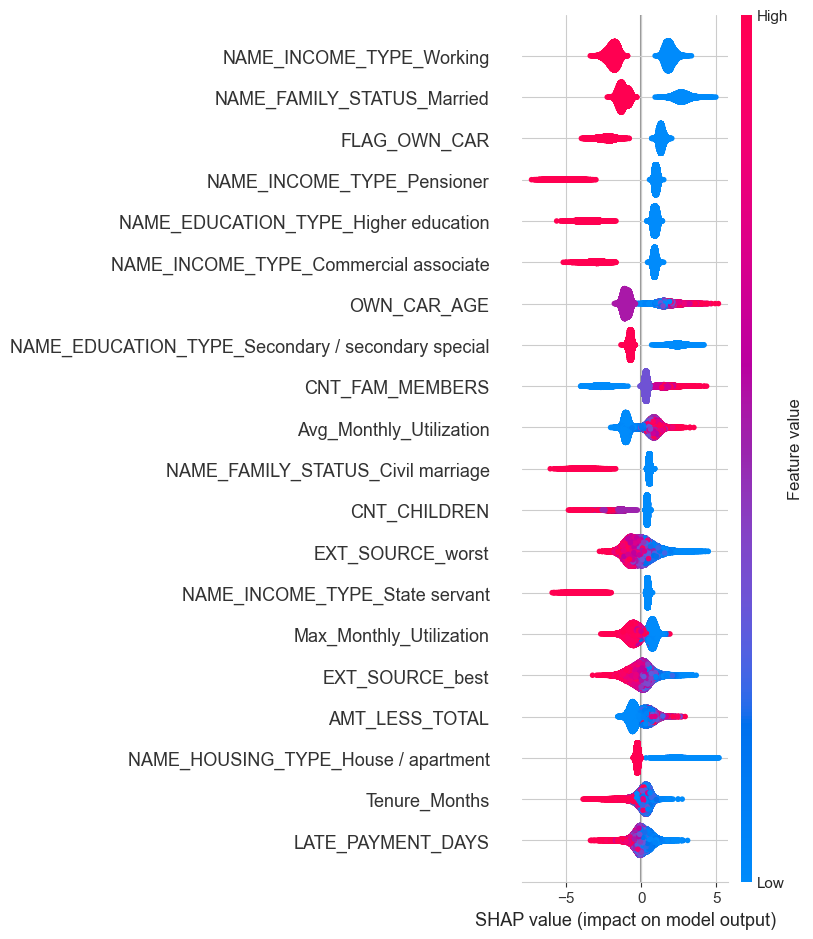

In [38]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(best_xgb_model, X_train)
shap_values = explainer(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)

In [46]:
# Compute mean absolute SHAP values for each feature
shap_summary = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean SHAP Value', ascending=False)

# Display the summary
shap_summary

,Feature,Mean SHAP Value
46,NAME_INCOME_TYPE_Working,1.884652
53,NAME_FAMILY_STATUS_Married,1.695084
17,FLAG_OWN_CAR,1.656942
43,NAME_INCOME_TYPE_Pensioner,1.602651
48,NAME_EDUCATION_TYPE_Higher education,1.535144
...,...,...
47,NAME_EDUCATION_TYPE_Academic degree,0.001524
68,OCCUPATION_TYPE_HR staff,0.001193
76,OCCUPATION_TYPE_Realty agents,0.001082
70,OCCUPATION_TYPE_IT staff,0.000239
